In [1]:
from neural_network.binary_nn import NN
from datasets.sipm_dataset import SiPMDataset
from genetic_algorithm.algorithm import GeneticAlgorithm

In [2]:
# GA parameters
mutation_prob = 0.05
pop_size = 10       # small population for demo
ngen = 5            # few generations
n_samples = 128

# nn = NN((genome_length, 64, 128, 2), input=SiPMDataset(n_samples=genome_length))
nn = NN((n_samples, 16, 128, 2), input=SiPMDataset(n_samples=n_samples))

ga = GeneticAlgorithm(
    nn=nn, 
    pop_size=pop_size,
    ngen=ngen,
    elite_size=2,
)

In [3]:
pop, log, hof = ga.run()

Create init population...
Start evolution...
   	      	        divers        	                          fitness                           	         size         
   	      	----------------------	------------------------------------------------------------	----------------------
gen	nevals	gen	max 	nevals	avg  	diversity	gen	max   	min	nevals	time	gen	max  	nevals
0  	10    	0  	0.98	10    	0.003	0.3      	0  	0.0196	0  	10    	12 s	0  	0.106	10    
1  	8     	1  	0.98	8     	0.017	0.5      	1  	0.1295	0  	8     	23 s	1  	0.106	8     
2  	8     	2  	0.45	8     	0.091	1        	2  	0.176 	0  	8     	32 s	2  	0.106	8     
3  	10    	3  	0.56	10    	0.126	0.8      	3  	0.1748	0.016	10    	44 s	3  	0.104	10    
4  	8     	4  	0.74	8     	0.122	0.8      	4  	0.1776	0.0004	8     	56 s	4  	0.106	8     
5  	6     	5  	0.74	6     	0.108	0.8      	5  	0.1927	0.0288	6     	1 m, 4 s	5  	0.105	6     
Evolution finished.


In [4]:
print("Best individual:", hof[0])
print("Best fitness:", ga.nn.fitness(hof[0]))
print("GA run complete.\n")

Best individual: [np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int6

# Plotting

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Publication
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'

plt.rcParams['savefig.facecolor']='white'

%matplotlib inline

In [6]:
indi = hof[0]

Text(0.5, 1.0, 'NN Net: [128  16 128   2], Weights: 2-bit, Neurons: 2-bit | fitness')

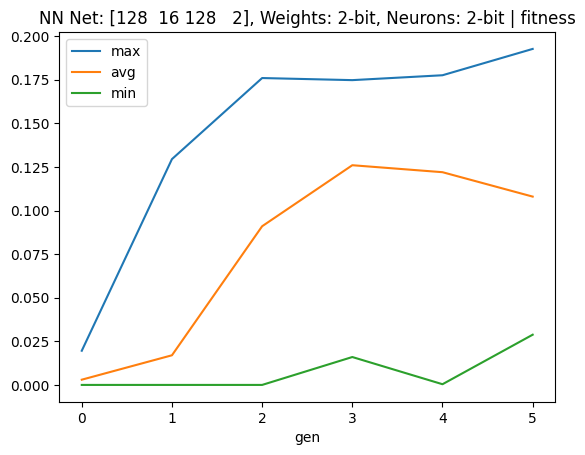

In [7]:
pd.DataFrame(log.chapters['fitness']).plot("gen", ["max","avg","min"])
plt.title(f"{nn} | fitness")

Text(0.5, 1.0, 'NN Net: [128  16 128   2], Weights: 2-bit, Neurons: 2-bit | size')

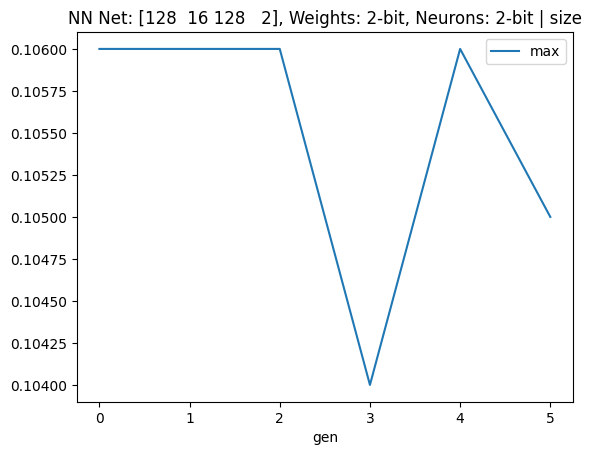

In [8]:
pd.DataFrame(log.chapters['size']).plot("gen", ["max"])#,"avg","min"])
plt.title(f"{nn} | size")

Text(0.5, 1.0, 'NN Net: [128  16 128   2], Weights: 2-bit, Neurons: 2-bit with Training data')

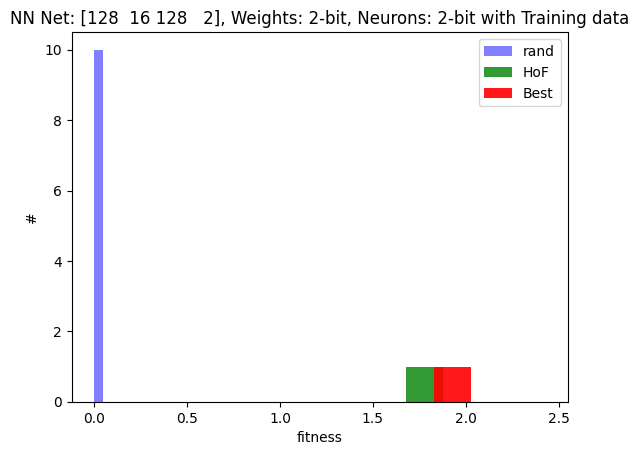

In [20]:
bins = np.linspace(0,1,21)
rand_fitness = [nn.evaluate(nn.get_rand_indi())[0] for _ in range(10)]
plt.hist(rand_fitness, bins=bins, alpha=0.5, color='blue' ,  label="rand")
plt.hist([hof[i].fitness.wvalues[0] for i in range(1, min(10,len(hof)))], bins=5, alpha=0.8, color='green',  label="HoF")
plt.hist([hof[0].fitness.wvalues[0]], bins=5, alpha=0.9, color='red', label="Best")

plt.legend()
plt.xlabel("fitness")
plt.ylabel("#")
plt.title(f"{nn} with Training data")

## Confusion Matrix

In [10]:
from genetic_algorithm.utils import tuple_to_label, confusion_matrix

SiPM_lbl = "Good"
Nois_lbl = "Ugly" # "Double"

100 100


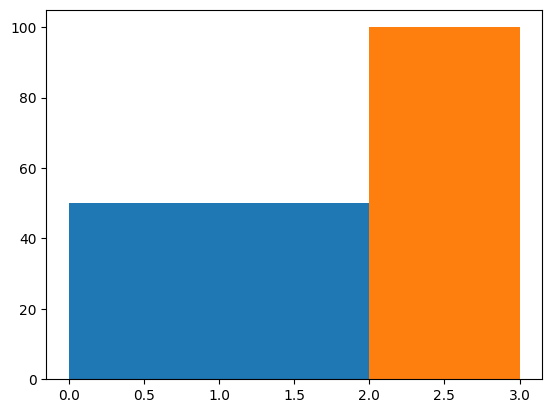

In [11]:
X_good, X_ugly = nn.input.gen_good_ugly_data() # type: ignore

res_good = np.apply_along_axis(func1d=nn.run_nn, axis=1, arr=X_good)
res_ugly = np.apply_along_axis(func1d=nn.run_nn, axis=1, arr=X_ugly)
# res_rand = [nn.evaluate(nn.get_rand_indi()) for _ in range(100)]
# res_rand = np.apply_along_axis(func1d=nn.evaluate, axis=1, arr=[nn.get_rand_indi() for _ in range(1000)])


# res = tuple_to_label( np.concatenate([res_good, res_ugly, res_rand]) )
# tru = tuple_to_label( np.concatenate([[[1,0]]*len(res_good),[[0,1]]*len(res_ugly),[[1,1]]*len(res_rand)]) )
res = tuple_to_label( np.concatenate([res_good, res_ugly]) )
tru = tuple_to_label( np.concatenate([[[1,0]]*len(res_good),[[0,1]]*len(res_ugly)]) )
print(len(res), len(tru), )
plt.hist(tru, bins=range(4))
plt.hist(res, bins=range(4))

cm = confusion_matrix(tru,res)

[[ 0  0  0]
 [ 0  0  0]
 [50 50  0]]
0 0 0 Text(0.0, 0.0, '0')
0 1 0 Text(0.0, 1.0, '0')
0 2 0 Text(0.0, 2.0, '0')
1 0 0 Text(1.0, 0.0, '0')
1 1 0 Text(1.0, 1.0, '0')
1 2 0 Text(1.0, 2.0, '0')
2 0 50 Text(2.0, 0.0, '50')
2 1 50 Text(2.0, 1.0, '50')
2 2 0 Text(2.0, 2.0, '0')


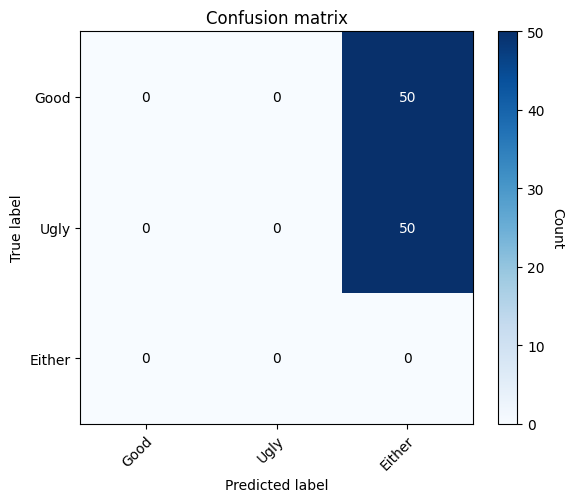

In [12]:
def plot_confusion_matrix(cm,
                          class_names=["Good","Bad","Either"],
                          title='Confusion matrix',
                          cmap='Blues',
                          normalize=False,
                          figsize=(6, 5)):
    """
    Draw a confusion matrix with Matplotlib.

    Parameters
    ----------
    cm : ndarray, shape (n_classes, n_classes)
        The confusion matrix (raw counts or already normalized).
    class_names : list of str, optional
        Human readable names for each class.  If None, uses 0,1,… .
    title : str, optional
    cmap : str or Colormap, optional
        Colormap used for the heat‑map.
    normalize : bool, optional
        If True, each row is normalized to sum to 1 (i.e. per‑class recall).
    figsize : tuple, optional
    """
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    if normalize:
        # Avoid division by zero
        row_sums = cm.sum(axis=1, keepdims=True)
        cm_disp = np.divide(cm, row_sums, where=row_sums != 0)
    else:
        cm_disp = cm

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm_disp.T, interpolation='nearest', cmap=cmap)

    # Color‑bar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Normalized fraction' if normalize else 'Count',
                       rotation=-90, va="bottom")

    # Tick marks + labels
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=class_names,
        yticklabels=class_names,
        ylabel='True label',
        xlabel='Predicted label',
        title=title
    )

    # Rotate the x‑tick labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Annotate each cell with the numeric value
    thresh = cm_disp.max() / 2.0/1.2
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = cm_disp[i, j]
            col = "white" if val > thresh else "black"
            r = ax.text(float(i), float(j), format(val, fmt),
                    ha="center", va="center",
                    color=col)
            print(i,j,format(val, fmt),r)

    fig.tight_layout()
    plt.show()

print(cm)
plot_confusion_matrix(cm, class_names=[SiPM_lbl,Nois_lbl,"Either"],)

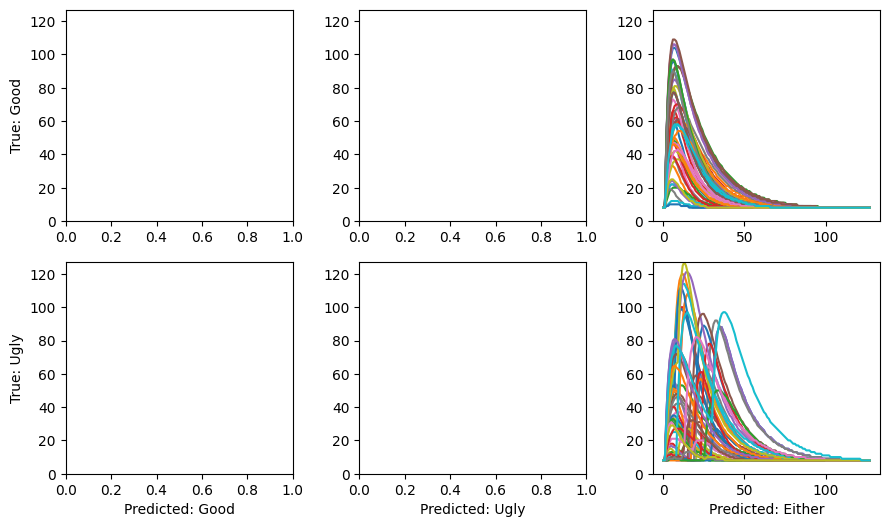

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6*0.9))

max_plts = 100
Train_D_good, Train_D_ugly = nn.input.gen_good_ugly_data()

cnt = 0
clplot = {0:[0,0], 1:[0,1], 2:[0,2]}
for i in zip(tuple_to_label(res_good[:max_plts]),Train_D_good[:max_plts]):
    # if i[0]==0:
        axes[*clplot[i[0]]].plot(i[1])
        # print(i[0])

clplot = {0:[1,0], 1:[1,1], 2:[1,2]}
for i in zip(tuple_to_label(res_ugly[:max_plts]),Train_D_ugly[:max_plts]):
    # if np.sum(i[0])==1:
        axes[*clplot[i[0]]].plot(i[1])
        # print(i[0])

for i in range(2):
    for j in range(3):
        axes[i,j].set_ylim([0,127])

axes[0,0].set_ylabel("True: " + SiPM_lbl)
axes[1,0].set_ylabel("True: " + Nois_lbl)
axes[1,0].set_xlabel("Predicted: " + SiPM_lbl)
axes[1,1].set_xlabel("Predicted: " + Nois_lbl)
axes[1,2].set_xlabel("Predicted: Either")

plt.tight_layout()
plt.show()